# Gaussian Graphical Models for Pearson and Partial Correlation estimation

The aim of this section is to get famialiarized with Gaussian Graphical models as the natural framework where to define ans estimate Pearson and Partial correlation measures for connectivity studies.

This block in structured in the following parts:

1) Markov graphs and their propoerties (Board)

2) Gaussian Graphical models: How to generate and estimate conditional dependent/independent samples (Notebook)

3) Pearson and Partial correlation measures: Estimation and significance testing (Notebook)


Reference:
Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction, Springer Series in Statistics

## Gaussian Graphical models: How to generate (and estimate) conditional dependent/independent samples
### a) Setting initial covariance and precision matrices
We first set the theoretical covariance and precision matrices of the initial network.

Covariance matrix
[[ 0.6672555  -1.08216784 -0.06694985]
 [-1.08216784  3.10361506  0.23825   ]
 [-0.06694985  0.23825     0.73431932]]
Precision matrix
[[ 3.45348711  1.21013068 -0.07776342]
 [ 1.21013068  0.75447477 -0.13445859]
 [-0.07776342 -0.13445859  1.3983406 ]]


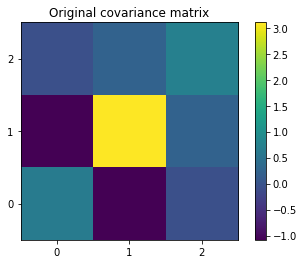

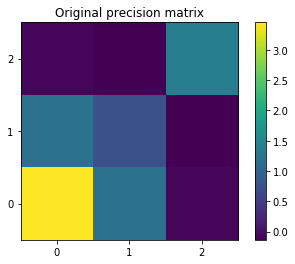

In [295]:
import numpy as np
from numpy import linalg as LA
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as pp

save_figs=1

#Start with a basic graph
number_nodes=3


#Setting parameters
#mean
mean = np.zeros(number_nodes)
#covariance matrix (using a random generator of semi-definitive matrices)
cov = make_spd_matrix(number_nodes)
inv_cov=LA.pinv(cov)

#printing covariance matrix
print ("Covariance matrix")
print(np.matrix(cov))
print ("Precision matrix")
print(np.matrix(inv_cov))



pp.figure()
pp.title('Original covariance matrix')
pp.imshow(cov,interpolation='nearest',origin='bottom')
pp.xticks([0,1,2], ['0', '1', '2'])
pp.yticks([0,1,2], ['0', '1', '2'])
pp.colorbar()
if save_figs:
   pp.savefig('orig_prec') 
pp.show()

pp.figure()
pp.title('Original precision matrix')
pp.imshow(inv_cov,interpolation='nearest',origin='bottom')
pp.xticks([0,1,2], ['0', '1', '2'])
pp.yticks([0,1,2], ['0', '1', '2'])
pp.colorbar()
if save_figs:
   pp.savefig('orig_prec') 
pp.show()

    




### b) Connecting an additional node to the network
We consider the  parameters of an additional node to be connected to the existing network: (local) mean, (local) variance and connectivity weights. 

Mean is 0.00e+00
Variance 1.50e+00


Structural weights
[[0. ]
 [0.5]
 [0.5]]


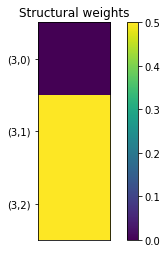

Functional weights
[[-0.57455884]
 [ 1.67093253]
 [ 0.48628466]]


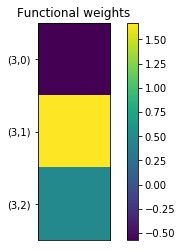

In [296]:
#Mean and Variance
mean_node=0
sigma_node=1.5
print("Mean is %1.2e" %(mean_node))
print("Variance %1.2e" %(sigma_node))
sigma_node=np.reshape(sigma_node, (1,1))
print("\n")

#Connectivity weights

#1.Structural weights (free choice)
Beta=np.array([0., 0.5, 0.5])
Beta=np.reshape(Beta, (3,1))

print("Structural weights")
print(Beta)
pp.figure()
pp.title('Structural weights')
pp.imshow(Beta)
pp.xticks([], [])
pp.yticks([0,1,2], ['(3,0)', '(3,1)', '(3,2)'])
pp.colorbar()
if save_figs:
   pp.savefig('Beta') 
pp.show()

#2.Functional weights: Computation of covariance factor
cov_zy=np.dot(cov,Beta)
cov_zy=np.reshape(cov_zy,(3,1))
print("Functional weights")
print(cov_zy)
pp.figure()
pp.title('Functional weights')
pp.imshow(cov_zy)
pp.xticks([], [])
pp.yticks([0,1,2], ['(3,0)', '(3,1)', '(3,2)'])
pp.colorbar()
if save_figs:
   pp.savefig('Beta') 
pp.show()
    

### c) Updating theoretical covariance and precision matrices 
Using the above parameters we update the theoretical covariance and precision matrices of the new network.

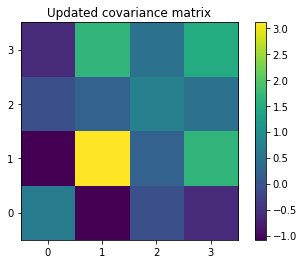

[[ 0.6672555  -1.08216784 -0.06694985 -0.57455884]
 [-1.08216784  3.10361506  0.23825     1.67093253]
 [-0.06694985  0.23825     0.73431932  0.48628466]
 [-0.57455884  1.67093253  0.48628466  1.5       ]]


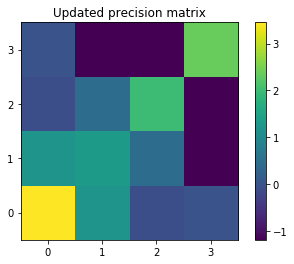

[[ 3.45348711e+00  1.21013068e+00 -7.77634190e-02 -0.00000000e+00]
 [ 1.21013068e+00  1.34774743e+00  4.58814064e-01 -1.18654532e+00]
 [-7.77634190e-02  4.58814064e-01  1.99161325e+00 -1.18654532e+00]
 [-2.12419451e-15 -1.18654532e+00 -1.18654532e+00  2.37309063e+00]]


In [297]:

#Updating the covariance matrix
conc1=np.concatenate((cov, cov_zy),axis=1)
conc2=np.concatenate((cov_zy.T, sigma_node),axis=1)
cov_updated=np.concatenate((conc1,conc2), axis=0)


pp.figure()
pp.title('Updated covariance matrix')
pp.imshow(cov_updated,interpolation='nearest',origin='bottom')
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])
pp.colorbar()
if save_figs:
   pp.savefig('orig_prec') 
pp.show()
print(np.matrix(cov_updated))

#Updating the precision matrix
inv_cov_updated=LA.inv(cov_updated)
pp.figure()
pp.title('Updated precision matrix')
pp.imshow(inv_cov_updated,interpolation='nearest',origin='bottom')
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])
pp.colorbar()
if save_figs:
   pp.savefig('updated_prec') 
pp.show()
print(inv_cov_updated)



### d) Simulation validation: Generation of conditional dependent/independent samples of the added node
We here simulate samples of the updated network to infer connectivity weights. We start by generating the conditional samples of the new added node and visualize the problem dimensionality.  

In [298]:

N = 20000 # number of samples
updated_number_nodes=number_nodes+1
Z= np.random.multivariate_normal(mean, cov, N).T
Z=np.reshape(Z,(number_nodes, N))


#Generate conditional distribution of the added node 
mu_init=mean_node
sigma_init=sigma_node
cross_term=cov_zy.T


#conditional variance
sigma_cond=sigma_init-np.dot(cross_term,np.dot(inv_cov,cross_term.T))

#Generate conditional samplesvia a for loop
Y=np.zeros((1,N))
for i in range(N):
    #conditional mean for each sample
    mu_cond=mu_init+np.dot(cross_term,np.dot(inv_cov,np.transpose(Z[:,i]-mean)))
    Y[:,i]= np.random.normal(mu_cond, np.sqrt(sigma_cond[0]), 1)

#Whole new sample
X = np.concatenate((Z, Y))
print("Dimensions of the network data (variable nodes x samples)")
print(X.shape)



Dimensions of the network data (variable nodes x samples)
(4, 20000)


### e) Simulation validation: Estimation of the covariance and precision matrices
Then, we estimate the whole covariance and precision matrices from the generated data observations

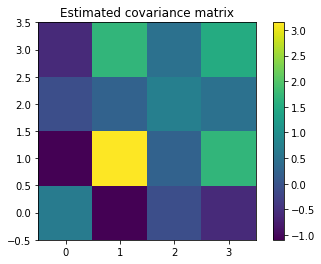

[[ 0.66875302 -1.09212885 -0.06582071 -0.57936402]
 [-1.09212885  3.14672202  0.24492595  1.69984076]
 [-0.06582071  0.24492595  0.73791861  0.49346945]
 [-0.57936402  1.69984076  0.49346945  1.52079425]]


Frobenius-norm error between original and estimated covariance matrix = 6.65e-02


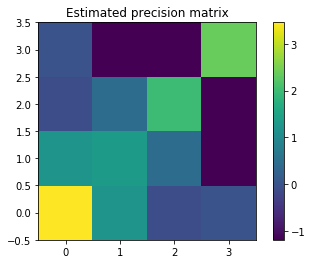

[[ 3.45787429  1.21124745 -0.0883322  -0.00787127]
 [ 1.21124745  1.34677707  0.45863179 -1.19271502]
 [-0.0883322   0.45863179  1.9927882  -1.19290142]
 [-0.00787127 -1.19271502 -1.19290142  2.37476285]]


Frobenius-norm error between original and estimated precision matrix = 2.30e-02


In [299]:

#Estimate covariance and precision matrices
cov_updated_hat=np.cov(X)

#Covariance matrix
pp.figure()
pp.title('Estimated covariance matrix')
pp.imshow(cov_updated_hat,interpolation='nearest',origin='bottom')
pp.colorbar()
if save_figs:
   pp.savefig('estimated_prec') 
pp.show()
print(np.matrix(cov_updated_hat))
print('\n')
print("Frobenius-norm error between original and estimated covariance matrix = %1.2e" %(LA.norm(cov_updated-cov_updated_hat)))


#Precision matrix
inv_cov_updated_hat=LA.pinv(cov_updated_hat)
pp.figure()
pp.title('Estimated precision matrix')
pp.imshow(inv_cov_updated_hat,interpolation='nearest',origin='bottom')
pp.colorbar()
if save_figs:
   pp.savefig('estimated_prec') 
pp.show()
print(np.matrix(inv_cov_updated_hat))
print('\n')
print("Frobenius-norm error between original and estimated precision matrix = %1.2e" %(LA.norm(inv_cov_updated-inv_cov_updated_hat)))


# Pearson and Partial correlation: Estimation and significance testing 
We here compute the Pearson and Partial correlation estimates as a function of the covariance and precision matrices.

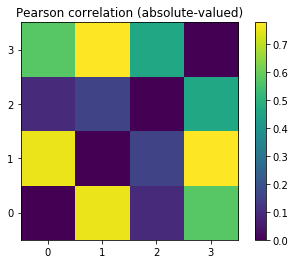

[[0.         0.75285582 0.09369695 0.57449125]
 [0.75285582 0.         0.16073164 0.77704079]
 [0.09369695 0.16073164 0.         0.46582287]
 [0.57449125 0.77704079 0.46582287 0.        ]]


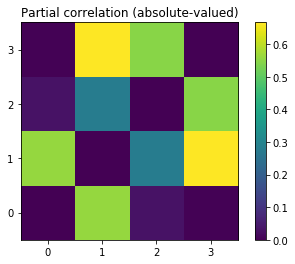

[[0.         0.5612811  0.03364991 0.00274682]
 [0.5612811  0.         0.27995339 0.66692763]
 [0.03364991 0.27995339 0.         0.54835759]
 [0.00274682 0.66692763 0.54835759 0.        ]]


In [300]:
   
mask_diag = np.eye(updated_number_nodes,dtype=np.bool) # mask for diagonal elements
    
# Pearson correlation
FC = np.array(cov_updated_hat)
FC /= np.sqrt(np.outer(FC.diagonal(),FC.diagonal()))
FC[mask_diag] = 0
        
# Partial correlation
PC = np.array(inv_cov_updated_hat)
PC /= -np.sqrt(np.outer(PC.diagonal(),PC.diagonal()))
PC[mask_diag] = 0
    
        
pp.figure()
pp.title('Pearson correlation (absolute-valued)')
pp.imshow(abs(FC),interpolation='nearest',origin='bottom')
pp.colorbar()
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])
if save_figs:
    pp.savefig('Pearson')
pp.show() 
print(np.matrix(abs(FC)))

pp.figure()
pp.title('Partial correlation (absolute-valued)')
pp.imshow(abs(PC),interpolation='nearest',origin='bottom')
pp.colorbar()
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])
if save_figs:
    pp.savefig('PC')
pp.show() 
print(np.matrix(abs(PC)))

Finally, we make use of significane testig to extract a binary decision on the existence of functional and structural weights in the network. 

Significance level
0.05
Multiple comparison significance threshold
0.008333333333333333


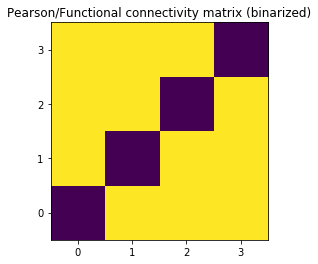

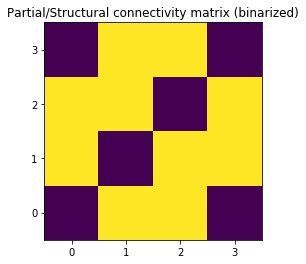

In [288]:
import numpy as np
from scipy import stats, linalg

def pearson_partial_corr_p_values(C):
    """
    Returns the p-values of Pearson/partial correlation using the statistic exact distribution 
    of the sample correlation coefficient
    
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the p-value of Pearson/Partial correlation of C[:, i] and C[:, j]"""

    
    C = np.asarray(C)
    p = C.shape[1]
    FC_pval = np.zeros((p, p), dtype=np.float)
    PC_pval = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        PC_pval[i, i] = 1
        FC_pval[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            
            corr = stats.pearsonr(C[:, j], C[:, i])[1]
            corr = stats.pearsonr(C[:, i], C[:, j])[1]
            FC_pval[i, j] = corr
            FC_pval[j, i] = corr
            
            
            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            corr = stats.pearsonr(res_i, res_j)[1]
            corr = stats.pearsonr(res_i, res_j)[1]
            PC_pval[i, j] = corr
            PC_pval[j, i] = corr
        
    return FC_pval, PC_pval 

#Signifricance Levels
sign_th=0.05
number_comparisons=updated_number_nodes*(updated_number_nodes-1)/2
multiple_comparison_sign_th=sign_th/number_comparisons
print("Significance level")
print(sign_th)
print("Multiple comparison significance threshold")
print(multiple_comparison_sign_th)


#Significance testing
FC_pval, PC_pval=pearson_partial_corr_p_values(X.T)
FC_connectivity=FC_pval<multiple_comparison_threshold
PC_connectivity=PC_pval<multiple_comparison_threshold


pp.figure()
pp.title('Pearson/Functional connectivity matrix (binarized)')
pp.imshow(FC_connectivity,interpolation='nearest',origin='bottom')
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])


pp.figure()
pp.title('Partial/Structural connectivity matrix (binarized)')
pp.imshow(PC_connectivity,interpolation='nearest',origin='bottom')
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])
if save_figs:
    pp.savefig('PC binary')

pp.show() 


